In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import calendar

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles(style='satellite')

import pytz
eastern = pytz.timezone('US/Eastern')

import sailboat as sb # local file sailboat.py
# this is to be able to edit the sailboat.py file and no need to refresh
%load_ext autoreload 
%autoreload 2

In [251]:
date = datetime.strptime('2021-04-01', '%Y-%m-%d')#(2021, 4, 1, tzinfo=eastern)
print(date)
date.astimezone(pytz.timezone('utc')).strftime('%Y-%m-%d+%H')

#2021-03-01+00
# utcmoment = utcmoment_naive.replace(tzinfo=pytz.utc)

2021-04-01 00:00:00


'2021-04-01+04'

In [252]:
datetime.strptime('2021-04-01', '%Y-%m-%d').astimezone(pytz.timezone('utc')).strftime('%Y-%m-%d+%H')

'2021-04-01+04'

# Tracks for Q3

In [20]:
url, dates = sb.gen_url(telemetry='min', date_interval=('2021-04-1', '2021-06-30'),
                        BB3=None, CI=None, CT=None, O2=None)
df = sb.get_data(url, dates)

Data variables are: ['GPSTimeStamp']


/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility ins

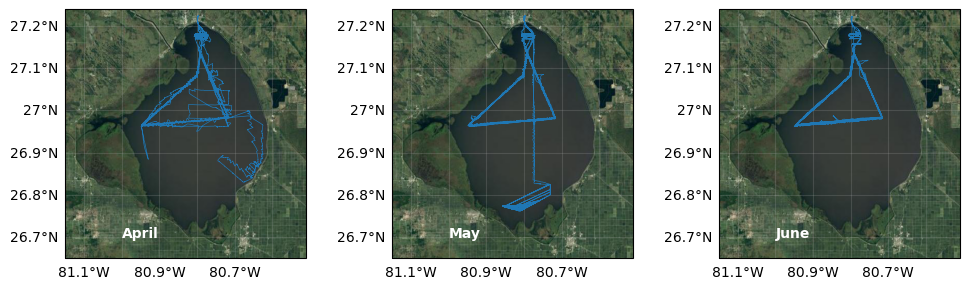

In [60]:
fig,axes, = plt.subplots(ncols=3,nrows=1,figsize=(10,3), dpi=100,
                      subplot_kw={'projection': request.crs}, sharey=True)

for m, ax in zip([4, 5, 6], axes.flatten()):
    sb.background(ax=ax, request=request)
    month = df[df['local time'].dt.month == m]
    month = month[month['Lon']<-80]
    ax.plot(month['Lon'], month['Lat'], transform=ccrs.PlateCarree(), lw=.5)
    ax.text(-81, 26.7, calendar.month_name[m], transform=ccrs.PlateCarree(), c='w', weight='bold')
fig.tight_layout()

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility ins

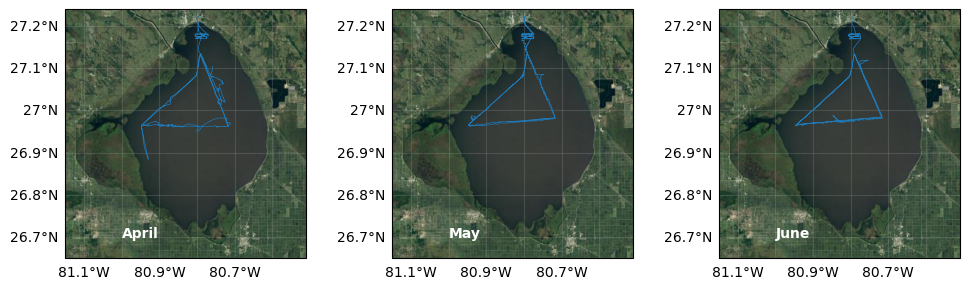

In [64]:
fig,axes, = plt.subplots(ncols=3,nrows=1,figsize=(10,3), dpi=100,
                      subplot_kw={'projection': request.crs}, sharey=True)

for m, ax in zip([4, 5, 6], axes.flatten()):
    sb.background(ax=ax, request=request)
    month = df[df['local time'].dt.month == m]
    month = month[month['Lon']<-80]
    month = month[(month['local time'].dt.day>6) & (month['local time'].dt.day<14)]
    ax.plot(month['Lon'], month['Lat'], transform=ccrs.PlateCarree(), lw=.5)
    ax.text(-81, 26.7, calendar.month_name[m], transform=ccrs.PlateCarree(), c='w', weight='bold')
fig.tight_layout()

# Canal Point/Pahokee mission: Apr 25 - 26
## Field validation: Apr 26 10:48 am 11:06 am and 11:18 am (EST)
## Surface Skim: Apr 26 10:47 am, 11:05 am, and 11:17 am (EST)

In [230]:
url, dates = sb.gen_url(telemetry='min', BB3='min', CI='min', CT=None, O2=None,limit=77400,
                        date_interval=('2021-04-25', '2021-04-27'))
cpdf = sb.get_data(url)

Data variables are: ['GPSTimeStamp']


Text(-81.12, 26.7, '2021-04-24 to 2021-04-26 ')

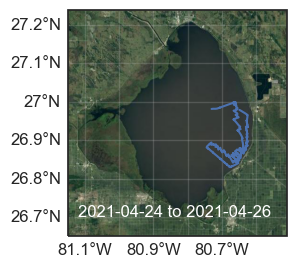

In [231]:
# m = 4; d1=24, d2=27
fig,ax = plt.subplots(figsize=(3,3), dpi=100,
                      subplot_kw={'projection': request.crs})
# # data select
# month = cpdf[cpdf['local time'].dt.month == m]
# month = month[month['Lon']<-80]
# month = month[(month['local time'].dt.day>d1) & (month['local time'].dt.day<d2)]
# plot
sb.background(ax=ax, request=request)
ax.plot(cpdf['Lon'], cpdf['Lat'], transform=ccrs.PlateCarree())
ax.text(-81.12, 26.7, str(cpdf['local time'].iloc[-1])[:11]+'to '+str(cpdf['local time'].iloc[0])[:11],
        transform=ccrs.PlateCarree(), c='w')

In [232]:
cpdf

,GPSTimeStamp,Lon,Lat,Track,Heading,Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,
313447,2021-04-26 23:55:57,-80.648956,26.979084,315.9,310.0,46.745,43.947,58.709,114.63,6.45,4.07,2021-04-26 19:55:57-04:00
313446,2021-04-26 23:55:11,-80.648598,26.978889,299.4,305.6,46.745,43.947,58.709,114.63,6.45,4.07,2021-04-26 19:55:11-04:00
313445,2021-04-26 23:54:51,-80.648438,26.978807,274.3,274.2,46.745,43.947,58.709,114.63,6.45,4.07,2021-04-26 19:54:51-04:00
313444,2021-04-26 23:54:31,-80.648254,26.978731,299.7,299.3,46.745,43.947,58.709,114.63,6.45,4.07,2021-04-26 19:54:31-04:00
313443,2021-04-26 23:54:10,-80.648064,26.978643,323.6,317.3,46.987,43.947,58.467,115.42,6.66,3.60,2021-04-26 19:54:10-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
307602,2021-04-25 00:28:52,-80.720169,26.981895,87.7,94.2,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-24 20:28:52-04:00
307601,2021-04-25 00:28:52,-80.720169,26.981895,87.7,94.2,44.323,42.005,56.041,119.86,10.42,5.21,2021-04-24 20:28:52-04:00
307600,2021-04-25 00:28:52,-80.720169,26.981895,87.7,94.2,44.323,42.005,56.041,119.86,10.42,5.21,2021-04-24 20:28:52-04:00


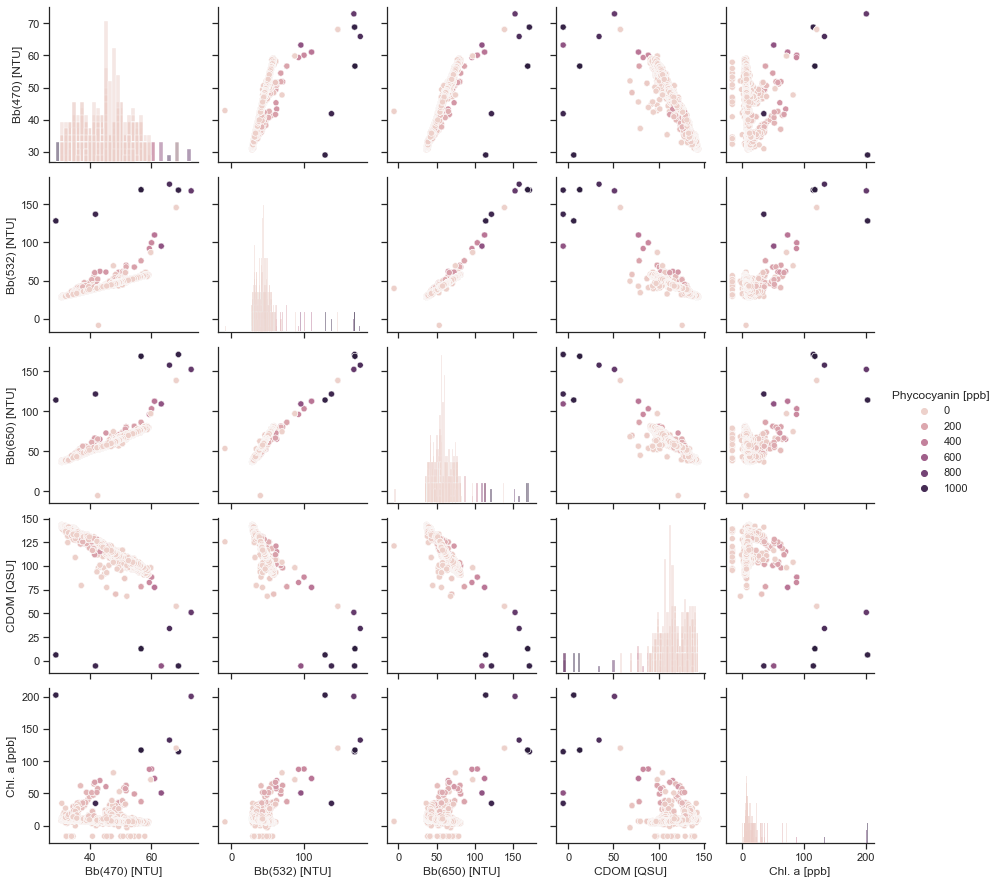

In [228]:
# sns.set(style="ticks", color_codes=True)
columns = ['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]', 'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']
fdf = cpdf.dropna()
sns.pairplot(fdf[columns], hue='Phycocyanin [ppb]', diag_kind='hist')

array([[<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(470) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(532) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubpl

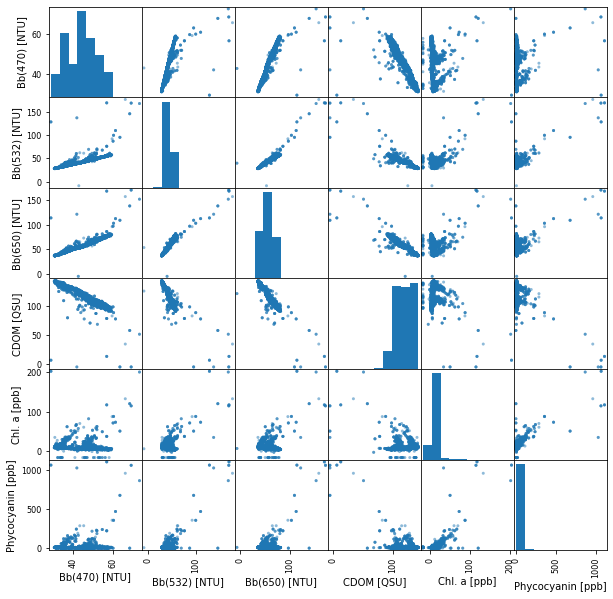

In [206]:
pd.plotting.scatter_matrix(cpdf[['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]',
                                'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']], figsize=(10,10))


# Clewiston mission: May 3-4
## no water samples were taken

In [233]:
url, dates = sb.gen_url(telemetry='min', BB3='min', CI='min', CT=None, O2=None,limit=77400,
                        date_interval=('2021-05-03', '2021-05-05'))
cldf = sb.get_data(url)
cldf

Data variables are: ['GPSTimeStamp']


,GPSTimeStamp,Lon,Lat,Track,Heading,Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,
330101,2021-05-04 23:59:47,-80.804909,27.180122,260.9,215.5,16.470,15.539,20.864,170.55,62.84,31.75,2021-05-04 19:59:47-04:00
330100,2021-05-04 23:57:57,-80.804260,27.180620,266.1,269.2,15.985,15.296,20.378,165.86,63.05,32.10,2021-05-04 19:57:57-04:00
330099,2021-05-04 23:57:38,-80.804054,27.180639,242.4,232.5,15.985,15.296,20.378,165.86,63.05,32.10,2021-05-04 19:57:38-04:00
330098,2021-05-04 23:57:16,-80.803795,27.180548,276.9,263.7,15.985,15.296,20.136,171.08,64.30,33.07,2021-05-04 19:57:16-04:00
330097,2021-05-04 23:56:56,-80.803566,27.180555,251.3,250.4,15.985,15.296,20.136,171.08,64.30,33.07,2021-05-04 19:56:56-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
326144,2021-05-03 00:13:49,-80.775421,26.946899,112.1,124.4,26.884,23.794,31.781,152.37,15.87,3.01,2021-05-02 20:13:49-04:00
326143,2021-05-03 00:13:28,-80.775574,26.946951,114.9,126.4,26.642,24.037,30.810,151.12,15.40,3.51,2021-05-02 20:13:28-04:00
326142,2021-05-03 00:13:08,-80.775734,26.946989,105.4,119.6,26.642,24.037,30.810,151.12,15.40,3.51,2021-05-02 20:13:08-04:00


Text(-81.12, 26.7, '2021-05-02 to 2021-05-04 ')

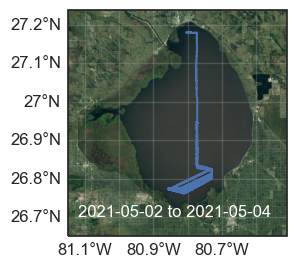

In [234]:
fig,ax = plt.subplots(figsize=(3,3), dpi=100,
                      subplot_kw={'projection': request.crs})

sb.background(ax=ax, request=request)
# month = df[df['local time'].dt.month == 5]
# month = month[(month['local time'].dt.day>2) & (month['local time'].dt.day<5)]
ax.plot(cldf['Lon'], cldf['Lat'], transform=ccrs.PlateCarree())
ax.text(-81.12, 26.7, str(cldf['local time'].iloc[-1])[:11]+'to '+str(cldf['local time'].iloc[0])[:11],
        transform=ccrs.PlateCarree(), c='w')


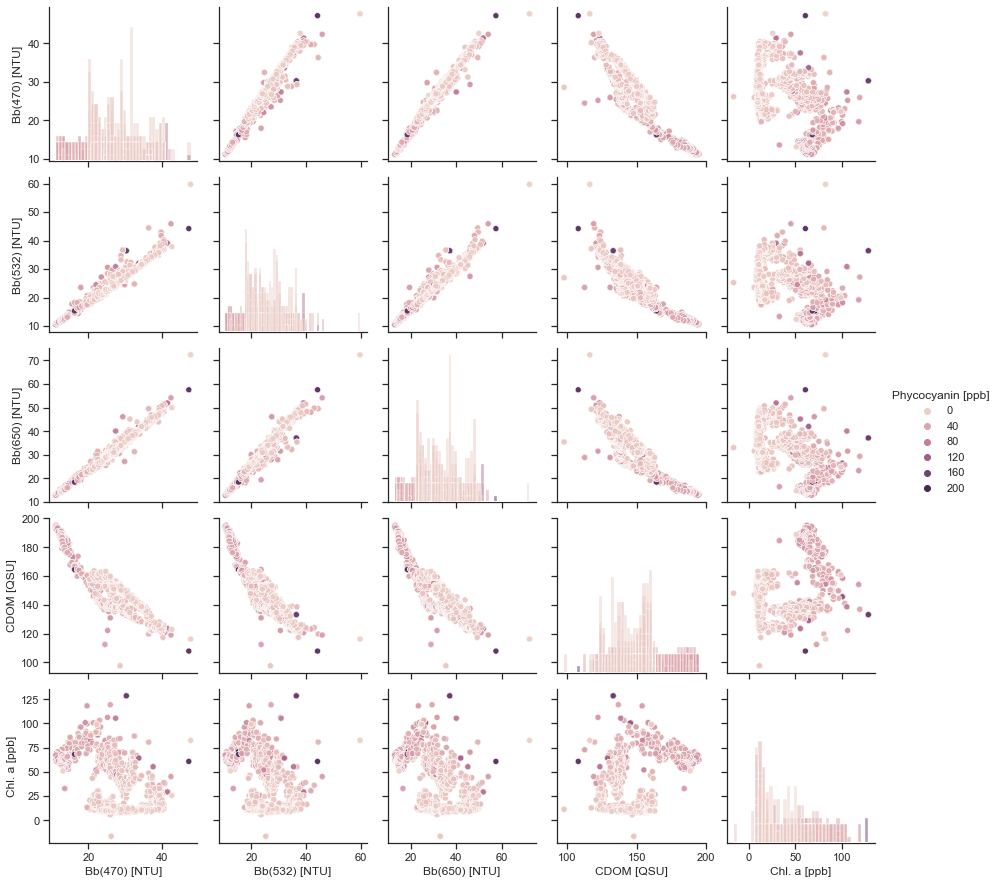

In [235]:
columns = ['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]', 'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']
fdf = cldf.dropna()
sns.pairplot(fdf[columns], hue='Phycocyanin [ppb]', diag_kind='hist')

array([[<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(470) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(532) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubpl

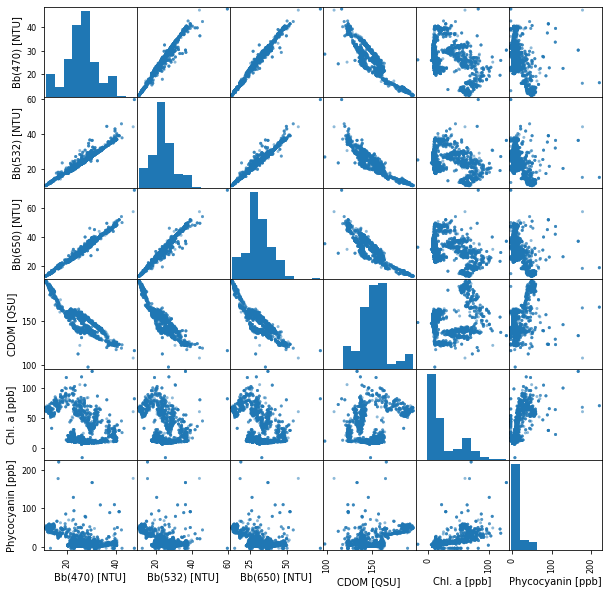

In [209]:
pd.plotting.scatter_matrix(cldf[['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]',
                                'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']], figsize=(10,10))

# Taylor Creek area 
## Field validation: Apr 21 12:34 pm and 12:57 pm and 1:24 pm (EST)

In [211]:
url, dates = sb.gen_url(telemetry='min', BB3='min', CI='min', CT=None, O2=None,limit=77400,
                        date_interval=('2021-04-21', '2021-04-22'))
tcdf = sb.get_data(url)
tcdf

Data variables are: ['GPSTimeStamp']


,GPSTimeStamp,Lon,Lat,Track,Heading,Bb(470) [NTU],Bb(532) [NTU],Bb(650) [NTU],CDOM [QSU],Chl. a [ppb],Phycocyanin [ppb],local time
Id,,,,,,,,,,,,
299704,2021-04-21 23:59:51,-80.795059,27.170172,327.9,318.4,12.837,11.897,15.284,199.11,44.78,18.67,2021-04-21 19:59:51-04:00
299703,2021-04-21 23:59:30,-80.795006,27.170113,320.1,319.0,13.079,12.383,15.769,199.31,46.25,19.77,2021-04-21 19:59:30-04:00
299702,2021-04-21 23:59:09,-80.794968,27.170046,335.6,322.7,13.079,12.383,15.769,199.31,46.25,19.77,2021-04-21 19:59:09-04:00
299701,2021-04-21 23:58:50,-80.794937,27.170012,318.6,311.5,13.079,12.383,15.769,199.31,46.25,19.77,2021-04-21 19:58:50-04:00
299700,2021-04-21 23:58:29,-80.794891,27.169958,335.2,324.5,12.837,12.140,15.526,199.68,44.48,19.04,2021-04-21 19:58:29-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...
296013,2021-04-21 00:53:58,-80.750443,27.006723,86.8,91.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-20 20:53:58-04:00
296012,2021-04-21 00:54:07,-80.750420,27.006721,98.3,106.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-04-20 20:54:07-04:00
296011,2021-04-21 00:38:51,-80.753319,27.006638,86.3,89.7,55.948,54.630,75.206,97.02,11.71,4.48,2021-04-20 20:38:51-04:00


/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(-81.12, 26.7, '2021-04-21 to 2021-04-21 ')

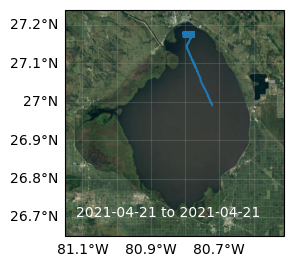

In [192]:
fig,ax = plt.subplots(figsize=(3,3), dpi=100,
                      subplot_kw={'projection': request.crs})

sb.background(ax=ax, request=request)
# month = df[df['local time'].dt.month == 4]
# month = month[(month['local time'].dt.day==21)]
ax.plot(tcdf['Lon'], tcdf['Lat'], transform=ccrs.PlateCarree())
ax.text(-81.12, 26.7, str(tcdf['local time'].iloc[-1])[:11]+'to '+str(tcdf['local time'].iloc[0])[:11],
        transform=ccrs.PlateCarree(), c='w')

array([[<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(470) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(470) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Bb(650) [NTU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='CDOM [QSU]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Chl. a [ppb]', ylabel='Bb(532) [NTU]'>,
        <AxesSubplot:xlabel='Phycocyanin [ppb]', ylabel='Bb(532) [NTU]'>],
       [<AxesSubplot:xlabel='Bb(470) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubplot:xlabel='Bb(532) [NTU]', ylabel='Bb(650) [NTU]'>,
        <AxesSubpl

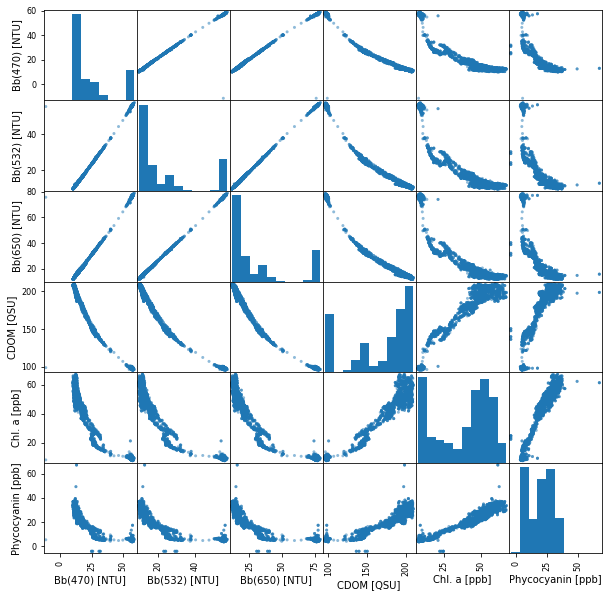

In [215]:
pd.plotting.scatter_matrix(tcdf[['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]',
                                'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']],
#                            c = tcdf['Phycocyanin [ppb]'],
                           figsize=(10,10))

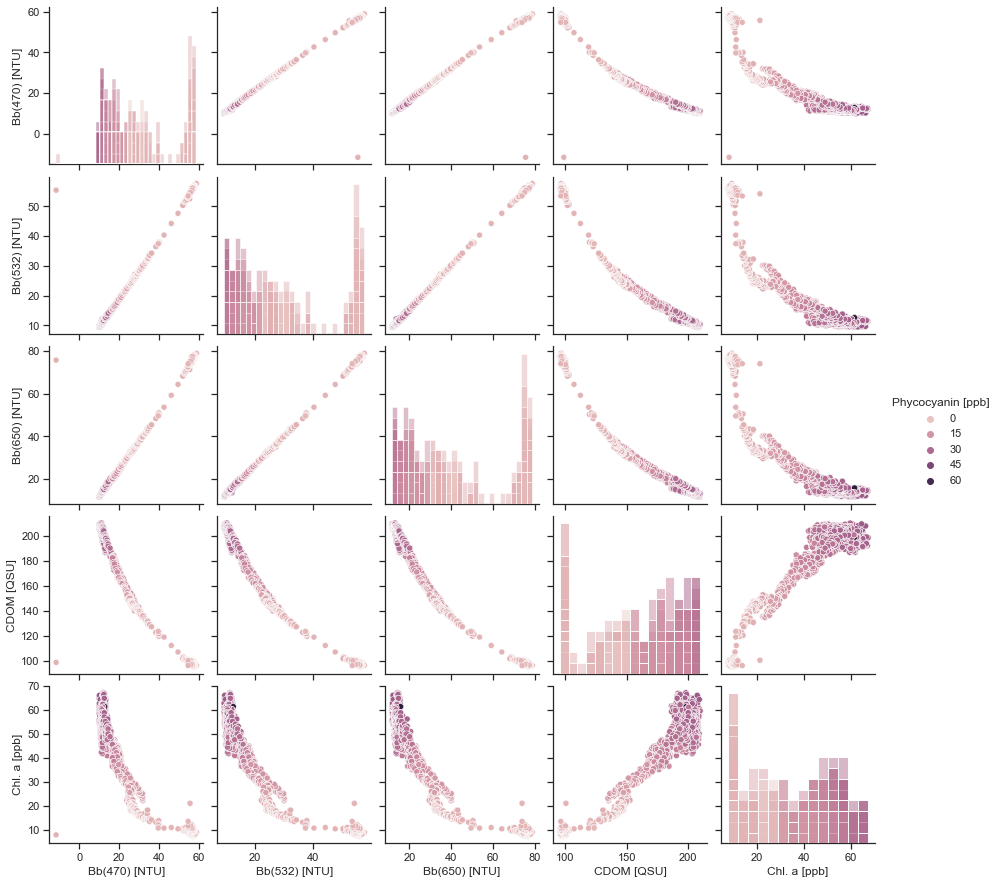

In [227]:

# sns.set(style="ticks", color_codes=True)
columns = ['Bb(470) [NTU]', 'Bb(532) [NTU]', 'Bb(650) [NTU]', 'CDOM [QSU]', 'Chl. a [ppb]','Phycocyanin [ppb]']
fdf = tcdf.dropna()
sns.pairplot(fdf[columns], hue='Phycocyanin [ppb]', diag_kind='hist')

<AxesSubplot:xlabel='Id'>

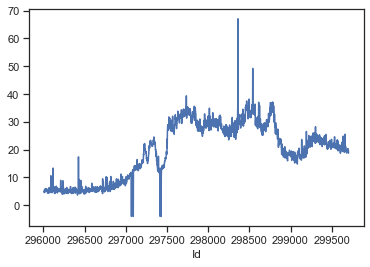

In [226]:
mport numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df, palette=["red"])
g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Text(-80.76, 27.21, '2021-04-29 ')

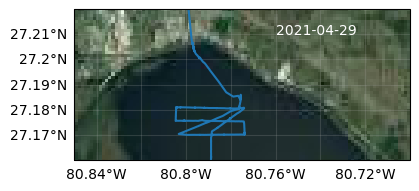

In [117]:
fig,ax = plt.subplots(figsize=(5,2), dpi=100,
                      subplot_kw={'projection': request.crs})

m = 4
sb.background(ax=ax, request=request, extent=[-80.85, -80.7, 27.16, 27.22])
month = df[df['local time'].dt.month == 4]
month = month[month['Lon']<-80]
month = month[(month['local time'].dt.day==29)]
ax.plot(month['Lon'], month['Lat'], transform=ccrs.PlateCarree())
ax.text(-80.76, 27.21, str(month['local time'].iloc[-1])[:11],
        transform=ccrs.PlateCarree(), c='w')

In [193]:
# murl = 'http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D&format=csv&output=file&start=2021-04-28+00%3A00%3A00&end=2021-04-30+00%3A00%3A00&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835'
# # mdf = sb.get_data(murl)
url, dates = sb.gen_url(telemetry='min', BB3=min,
                        CI=None, CT=None, O2=None,limit=77400,
                        date_interval=(''))


(0.0, 1.0)

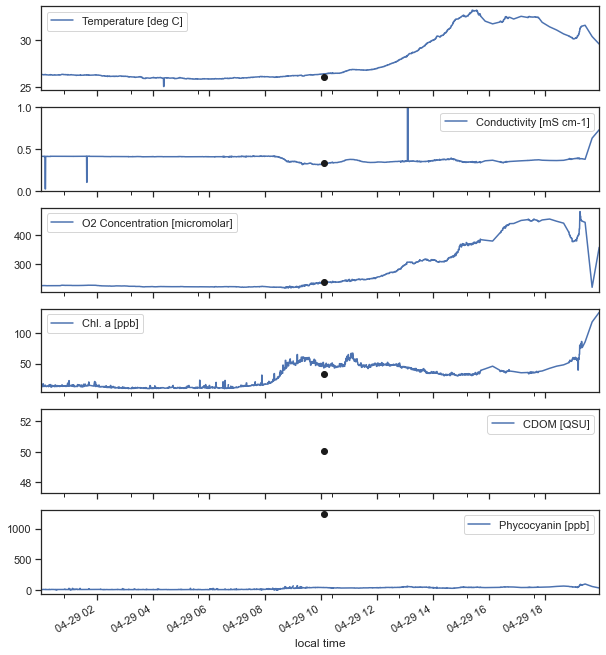

In [260]:
murl = 'http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D&format=csv&output=file&start=2021-04-28+00%3A00%3A00&end=2021-04-30+00%3A00%3A00&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835'
mdf = sb.get_data(murl)

day = mdf[(mdf['local time'].dt.day==29)]
fig, axes = plt.subplots(6, figsize=(10,12), sharex=True)

vnames = ['Temperature [deg C]', 'Conductivity [mS cm-1]', 'O2 Concentration [micromolar]', 
       'Chl. a [ppb]', 'CDOM [QSU]', 'Phycocyanin [ppb]']
vvals = [26.08552397, 0.033017043*10, 7.669923357/ 1.42903*44.66,
         33.25230548, 50.03059286, 1242.279958]
vmax = [27, 1., 100, 100, 100, 100]
for i in range(6):
    day.plot(x='local time', y=vnames[i], ax=axes[i])
#     axes[i].set_ylim(0, vmax[i])
    axes[i].plot(datetime(2021,4,29,9,10, tzinfo=eastern), vvals[i], 'ko')
axes[-1].set_xlim(day['local time'].iloc[-1], day['local time'].iloc[0])
axes[1].set_ylim(0,1)
# axes[3].plot(datetime(2021,4,29,9,10, tzinfo=eastern), 120.517088607595, 'ro')

<AxesSubplot:xlabel='local time'>

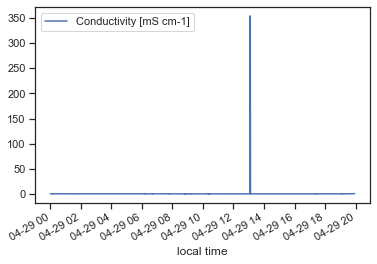

In [257]:
day.plot(x='local time', y='Conductivity [mS cm-1]')

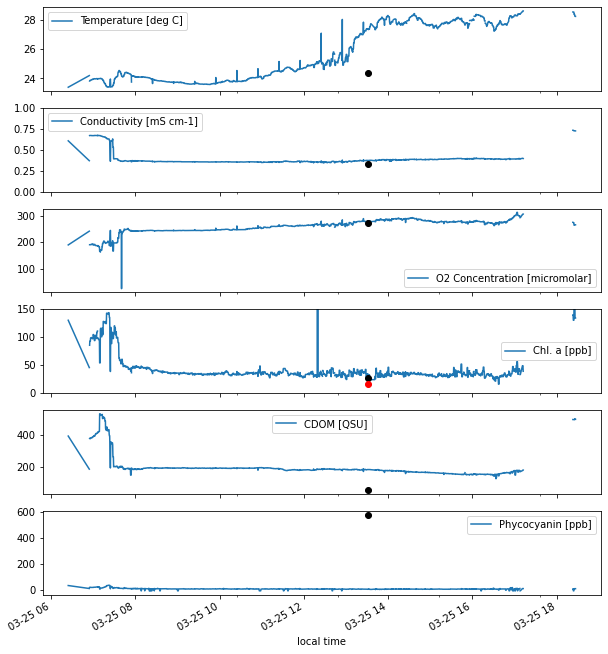

In [184]:
# m2url = 'http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D&format=csv&output=file&start=2021-03-01+00%3A00%3A00&end=2021-03-26+00%3A00%3A00&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835'

# m2df = sb.get_data(m2url)
# day = m2df[(m2df['local time'].dt.day==25)]

fig, axes = plt.subplots(6, figsize=(10,12), sharex=True)
vnames = ['Temperature [deg C]', 'Conductivity [mS cm-1]', 'O2 Concentration [micromolar]', 
       'Chl. a [ppb]', 'CDOM [QSU]', 'Phycocyanin [ppb]']
vvals =[24.34404768, 0.033635304*10, 8.750701501/ 1.42903*44.66, 
        27.90102344, 52.52386452, 583.6050515]

for i in range(6):
    day.plot(x='local time', y=vnames[i], ax=axes[i])
#     axes[i].set_ylim(0, vmax[i])
    axes[i].plot(datetime(2021,3,25,12,35, tzinfo=eastern), vvals[i], 'ko')
axes[1].set_ylim(0,1)
axes[3].set_ylim(0, 150)
axes[3].plot(datetime(2021,3,25,12,35, tzinfo=eastern), 16.0278481012658, 'ro')